# Notebook Examen PAPY 2022

# Partie 2: Programmation sur machine
Vous avez terminé la partie connaissance du python de cet examen. Maintenant, vous devez proposer un programme qui réalise le chiffrement suivant.

## Présentation du problème: Chiffrment par dictionnaire

### Chiffrement de César
En cryptographie, le chiffrement par décalage, aussi connu comme le chiffre de César, est une méthode de chiffrement très simple utilisée par Jules César dans ses correspondances secrètes.

![](img/Caesar3.svg)

Le texte chiffré s'obtient en remplaçant chaque lettre du texte clair original par une lettre à distance fixe, toujours du même côté, dans l'ordre de l'alphabet. Pour les dernières lettres (dans le cas d'un décalage à droite), on reprend au début. Par exemple avec un décalage de 3 vers la droite, A est remplacé par D, B devient E, et ainsi jusqu'à W qui devient Z, puis X devient A etc. Il s'agit d'une permutation circulaire de l'alphabet. La longueur du décalage, 3 dans l'exemple évoqué, constitue la clé du chiffrement qu'il suffit de transmettre au destinataire pour que celui-ci puisse déchiffrer le message. 

#### Example
Le chiffrement peut être représenté par la superposition de deux alphabets, l'alphabet clair présenté dans l'ordre normal et l'alphabet chiffré décalé, à gauche ou à droite, du nombre de lettres voulu. Nous avons ci-dessous l'exemple d'un encodage de 3 lettres vers la droite. Le paramètre de décalage (ici 3) est la clé de chiffrement :


| clair  |  ABCDEFGHIJKLMNOPQRSTUVWXYZ
|---    |:-:    |
|   chiffré       |DEFGHIJKLMNOPQRSTUVWXYZABC|

Pour encoder un message, il suffit de regarder chaque lettre du message clair, et d'écrire la lettre encodée correspondante. Pour déchiffrer, on fait tout simplement l'inverse.

| clair  | WIKIPEDIA L'ENCYCLOPEDIE LIBRE    
|---    |:-:    |
| chiffré |ZLNLSHGLD O'HQFBFORSHGLH OLEUH

*Source: Wikipedia*

### Chiffre de Vigenère
Le chiffrage ci-dessus est très faible, même pour une longue table de caractères, par exemple ASCII.

Pour améliorer la sécurité de notre chiffrement, on introduit un chiffrage plus complexe (aussi connue sous le nom de chiffre de Vigenère). Cette fois-ci, au lieu d'utiliser le même décalage pour tous les caractères, on va faire varier le décalage (shift) à chaque caractère. On utilisera pour cela une clé de chiffrage sous la forme d'une chaine de caractères (un mot ou une phrase) pour laquelle chaque lettre détermine le décalage (place dans la table de caractères). Lorsque la clé est épuisée, on reprend au premier élément de celle-ci.

Pour un indice donné `i`, on chiffrera le i-eme caractère du texte  `texte[i]` en applicant le décalage donné par la position de la `clé[i]`  dans le dictionnaire i.e. `shift[i]=position(clé[i],dic)`.


```
alpha="ABCDEFGHIJKLMNOPQRSTUVWXYZ"

Texte en clair :   j'adore ecouter la radio toute la journee
Clé répétée    :   M USIQU EMUSIQU EM USIQU EMUSI QU EMUSIQU
                   ^ ^^^
                   | ||Texte O, clé I : shift=8, on obtient le chiffré W
                   | |Texte D, clé S : shift=8, on obtient le chiffré L
                   | Texte A, clé U : shift=8, on obtient le chiffré I
                   Texte J, clé M : shift=8, on obtient le chiffré R
```

<div class="alert alert-danger" role="alert">
   <b> Attention : </b> vous devez documenter vos codes en utilisant a bon escient les commentaires et docstrings. Cela fait partie intégrante de l'évaluation de vos compétences.
</div>

## Implémentation du Code César
1. Écrire une fonction `caesar(message, alpha, shift)-> str` du codage César. Elle prend pour argument le texte (`message`), la clé (`shift`) et l'alphabet `alpha` et renvoie le texte chiffré. Vous testerez de façon adéquate avec l'alphabet standard `"ABCDEFGHIJKLMNOPQRSTUVWXYZ"`.
1. Encoder le message suivant : "Tu quoque mi fili" avec un décalage de 8.
1. Décoder ce message (en anglais): "ROVVY GYBVN" et en donner la clé.


In [21]:
# 2.2.1 Fonction 
def caesar(message, alpha, shift):
    """
    Renvoie le message chiifré avec le code César
    
    Parameters
    ----------
    message: str
        message à chiffrer
    alpha: list
        liste des lettres de l'alphabet à coder
    shift: int
        décalage pour le code César
    
    Returns
    -------
    str
        message codé
    
    Examples
    ---------
    >>> caesar("ABCDEFGHIJKLMNOPQRSTUVWXYZ", ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], 3)
    'DEFGHIJKLMNOPQRSTUVWXYZABC'
    """
    res = ""
    for lettre in message: # Dans ce premier exemple les espaces sont sautés, ce ne sera plus le cas lorsqu'on utilisera l'ASCII car l'espace correspond alors à un caractère
        if lettre not in alpha:
            res += lettre # on conserve les caractères n'étant pas connus dans l'alphabet, par exemple ' '
        else:
            index = alpha.index(lettre)
            new_index = index + shift
            new_index %= len(alpha) # On a ainsi le bouclage
            res += alpha[new_index]
    return res

In [47]:
#2.2.2 Encodage 
alpha = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
code = caesar("Tu quoque mi fili".upper(), alpha, 3)
print(code)

WX TXRTXH PL ILOL


In [23]:
for i in range(len(alpha)): # on teste les différentes possibilités
    print(f"Avec le décalage {i} le message en clair est {caesar('ROVVY GYBVN', alpha, -i)}")
print("===========\n============")
# Après un premier essai on a remarqué une ligne intéressante...
print(f"Avec le décalage 10 le message en clair est {caesar('ROVVY GYBVN', alpha, -10)}")

Avec le décalage 0 le message en clair est ROVVY GYBVN
Avec le décalage 1 le message en clair est QNUUX FXAUM
Avec le décalage 2 le message en clair est PMTTW EWZTL
Avec le décalage 3 le message en clair est OLSSV DVYSK
Avec le décalage 4 le message en clair est NKRRU CUXRJ
Avec le décalage 5 le message en clair est MJQQT BTWQI
Avec le décalage 6 le message en clair est LIPPS ASVPH
Avec le décalage 7 le message en clair est KHOOR ZRUOG
Avec le décalage 8 le message en clair est JGNNQ YQTNF
Avec le décalage 9 le message en clair est IFMMP XPSME
Avec le décalage 10 le message en clair est HELLO WORLD
Avec le décalage 11 le message en clair est GDKKN VNQKC
Avec le décalage 12 le message en clair est FCJJM UMPJB
Avec le décalage 13 le message en clair est EBIIL TLOIA
Avec le décalage 14 le message en clair est DAHHK SKNHZ
Avec le décalage 15 le message en clair est CZGGJ RJMGY
Avec le décalage 16 le message en clair est BYFFI QILFX
Avec le décalage 17 le message en clair est AXEEH PHKEW
Av

On va maintenant utiliser les caractères de la table ASCII imprimable qui va assurer le bon fonctionnement sur un texte en anglais (sans accent). On peut obtenir avec la commande suivante: 
```python
>>> [chr(i) for i in range(32,127)]
[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', 
'-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', 
';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 
 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 
 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 
 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}
 ', '~']
```

## Chiffre de Vigenère avec une classe
1. Créer une classe de chiffrement `Vigenere` qui stocke la clé `key` et le tableau de chiffrement `alpha` et qui possède la méthode `code` et `decode`. On s'assurera que l'exemple d'implémentation suivant fonctionne bien:
```python
>>> ASCII=[chr(i) for i in range(32,127)]
>>> enigma=Vigenere(alpha=ASCII,key="my fancy key!")
>>> print(enigma)
Vigenere encoder-decoder with
key="my fancy key!"
alpha=[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',
', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 
'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 
'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 
'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 
'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']
>>> coded_farm=enigma.code(animal_farm)
>>> enigma.decode(coded_farm)
Mr. Jones, of the Manor Farm, had locked the hen-houses for the 
night, but was too drunk to remember to shut the pop-holes...
```
2. Exécuter l'algorithme sur l'exemple de texte ci-dessous avec la clé `"George Orwell wrote more than 1984"` et stocker le résultat dans la variable `code_farm`. 

**Exemple de texte suffisamment long pour obtenir de bonnes statistiques. Animal Farm, George Orwell (1945) en version originale:**

Mr. Jones, of the Manor Farm, had locked the hen-houses for the night, but was too drunk to remember to shut the pop-holes. With the ring of light from his lantern dancing from side to side, he lurched across the yard, kicked off his boots at the back door, drew himself a last glass of beer from the barrel in the scullery, and made his way up to bed, where Mrs. Jones was already snoring.

As soon as the light in the bedroom went out there was a stirring and a fluttering all through the farm buildings. Word had gone round during the day that old Major, the prize Middle White boar, had had a strange dream on the previous night and wished to communicate it to the other animals. It had been agreed that they should all meet in the big barn as soon as Mr. Jones was safely out of the way. Old Major (so he was always called, though the name under which he had been exhibited was Willingdon Beauty) was so highly regarded on the farm that everyone was quite ready to lose an hour's sleep in order to hear what he had to say.

At one end of the big barn, on a sort of raised platform, Major was already ensconced on his bed of straw, under a lantern which hung from a beam. He was twelve years old and had lately grown rather stout, but he was still a majestic-looking pig, with a wise and benevolent appearance in spite of the fact that his tushes had never been cut. Before long the other animals began to arrive and make themselves comfortable after their different fashions. First came the three dogs, Bluebell, Jessie, and Pincher, and then the pigs, who settled down in the straw immediately in front of the platform. The hens perched themselves on the window-sills, the pigeons fluttered up to the rafters, the sheep and cows lay down behind the pigs and began to chew the cud. The two cart-horses, Boxer and Clover, came in together, walking very slowly and setting down their vast hairy hoofs with great care lest there should be some small animal concealed in the straw. Clover was a stout motherly mare approaching middle life, who had never quite got her figure back after her fourth foal. Boxer was an enormous beast, nearly eighteen hands high, and as strong as any two ordinary horses put together. A white stripe down his nose gave him a somewhat stupid appearance, and in fact he was not of first-rate intelligence, but he was universally respected for his steadiness of character and tremendous powers of work. After the horses came Muriel, the white goat, and Benjamin, the donkey. Benjamin was the oldest animal on the farm, and the worst tempered. He seldom talked, and when he did, it was usually to make some cynical remark—for instance, he would say that God had given him a tail to keep the flies off, but that he would sooner have had no tail and no flies. Alone among the animals on the farm he never laughed. If asked why, he would say that he saw nothing to laugh at. Nevertheless, without openly admitting it, he was devoted to Boxer; the two of them usually spent their Sundays together in the small paddock beyond the orchard, grazing side by side and never speaking.

In [56]:
### 2.3.1 Classe Vignemere
class Vigenere:
    """
    Classe permettant le chiffrement et déchiffrement Vigénère
    
    Attributs
    ---------
    alpha: list
        l'alphabet considéré pour le chiffrement
    key: str
        la clé de chiffrement
    """
    
    def __init__(self, alpha, key):
        self.alpha = alpha
        self.key = key
    
    def __repr__(self):
        """
        Print le Vugenere comme dans l'énoncé
        """
        res = f"Vigenere encoder-decoder with\n{self.key=}\n{self.alpha=}"
        return res
    
    def code(self, message):
        """
        Permet l'encodage d'un message
        
        Parameters
        ----------
        self: Vigenere
            l'instance de Vigenere contenant l'alphabet et la clé utilisée pour l'encodage
        message: str
            message à chiffrer
        
        Returns
        -------
        str:
            message chiffré
        """
        res = ""
        index_key = 0
        for lettre in message:
            if lettre in self.alpha:
                shift = self.alpha.index(self.key[index_key])
                res += caesar(lettre, self.alpha, shift) # le décalage est déjà codé avec la fonction césar
                index_key += 1
                index_key %= len(self.key) # Lorsque la clé est épuisée on reprend au premier caractère de celle-ci
            else: # si le caractère n'est pas dans l'alphabet, on le passe sans l'encoder
                res += lettre
        return res
    
    def decode(self, code):
        """
        Permet l'encodage d'un message
        
        Parameters
        ----------
        self: Vigenere
            l'instance de Vigenere contenant l'alphabet et la clé utilisée pour l'encodage
        code: str
            code à déchiffrer
        
        Returns
        -------
        str:
            message déchiffré
        """
        res = ""
        index_key = 0
        for lettre in code:
            if lettre in self.alpha:
                shift =  self.alpha.index(self.key[index_key])
                res += caesar(lettre, self.alpha, -shift) # le shift est déjà codé avec la fonction césar
                index_key += 1
                index_key %= len(self.key) # Lorsque la clé est épuisée on reprend au premier caractère de celle-ci
            else: # si le caractère n'est pas dans l'alphabet, on le passe sans l'encoder
                res += lettre
        return res    

In [58]:
### 2.3.2 Encodage d'animal farm
ASCII=[chr(i) for i in range(32,127)]
enigma=Vigenere(alpha=ASCII,key="my fancy key!")
#print(enigma)
animal_farm_short = "Mr. Jones, of the Manor Farm, had locked the hen-houses for the night, but was too drunk to remember to shut the pop-holes..."
encoded = enigma.code(animal_farm_short)
print(encoded)
decoded = enigma.decode(encoded)
print("================================")
print(decoded)


enigma2 = Vigenere(alpha = ASCII, key = "George Orwell wrote more than 1984")
animal_farm ="""
Mr. Jones, of the Manor Farm, had locked the hen-houses for the night, but was too drunk to remember to shut the pop-holes. With the ring of light from his lantern dancing from side to side, he lurched across the yard, kicked off his boots at the back door, drew himself a last glass of beer from the barrel in the scullery, and made his way up to bed, where Mrs. Jones was already snoring.

As soon as the light in the bedroom went out there was a stirring and a fluttering all through the farm buildings. Word had gone round during the day that old Major, the prize Middle White boar, had had a strange dream on the previous night and wished to communicate it to the other animals. It had been agreed that they should all meet in the big barn as soon as Mr. Jones was safely out of the way. Old Major (so he was always called, though the name under which he had been exhibited was Willingdon Beauty) was so highly regarded on the farm that everyone was quite ready to lose an hour's sleep in order to hear what he had to say.

At oneend of the big barn, on a sort of raised platform, Major was already ensconced on his bed of straw, under a lantern which hung from a beam. He was twelve years old and had lately grown rather stout, but he was still a majestic-looking pig, with a wise and benevolent appearance in spite of the fact that his tushes had never been cut. Before long the other animals began to arrive and make themselves comfortable after their different fashions. First came the three dogs, Bluebell, Jessie, and Pincher, and then the pigs, who settled down in the straw immediately in front of the platform. The hens perched themselves on the window-sills, the pigeons fluttered up to the rafters, the sheep and cows lay down behind the pigs and began to chew the cud. The two cart-horses, Boxer and Clover, came in together, walking very slowly and setting down their vast hairy hoofs with great care lest there should be some small animal concealed in the straw. Clover was a stout motherly mare approaching middle life, who had never quite got her figure back after her fourth foal. Boxer was an enormous beast, nearly eighteen hands high, and as strong as any two ordinary horses put together. A white stripe down his nose gave him a somewhat stupid appearance, and in fact he was not of first-rate intelligence, but he was universally respected for his steadiness of character and tremendous powers of work. After the horses came Muriel, the white goat, and Benjamin, the donkey. Benjamin was the oldest animal on the farm, and the worst tempered. He seldom talked, and when he did, it was usually to make some cynical remark—for instance, he would say that God had given him a tail to keep the flies off, but that he would sooner have had no tail and no flies. Alone among the animals on the farm he never laughed. If asked why, he would say that he saw nothing to laugh at. Nevertheless, without openly admitting it, he was devoted to Boxer; the two of them usually spent their Sundays together in the small paddock beyond the orchard, grazing side by side and never speaking.
"""
code_farm = enigma2.code(animal_farm)
print(code_farm[:100])

;l.f,^R_sweigmnhLa<Eho^e@b`g,fJPHyl[IefRytOGnL_nxNiva_sfH^VytTKyoWah[mnFotk][tmnoVaSVonWenpmleTG\F_rkZi!abu[acL_ \Uj.VilLU|q(
Mr. Jones, of the Manor Farm, had locked the hen-houses for the night, but was too drunk to remember to shut the pop-holes...

tX}r2Un5f$e\S l[Ut3a\_eeFV[Oz yz|44US^MJ D[]eURn%[_jYeaoYUrt]JT  # |<qoU]Z GTkea\owWbjTkmdberZVG\bv


## Codage et décodage d'un vrai texte
*On va maintenant démontrer la faiblesse du code César et la relative force du code de Vigenère.*

### Casser César
Dans cet exercice, on va attaquer le texte chiffré (avec la table `ASCII`) par la méthode César suivant:

In [87]:
message_secret="""Lok ~sp v*s}*lo~~o|*~rkx* qv$8
O#zvsms~*s}*lo~~o|*~rkx*swzvsms~8
]swzvo*s}*lo~~o|*~rkx*mywzvo#8
Mywzvo#*s}*lo~~o|*~rkx*mywzvsmk~on8
Pvk~*s}*lo~~o|*~rkx*xo}~on8
]zk|}o*s}*lo~~o|*~rkx*nox}o8
\oknklsvs~$*my x~}8
]zomskv*mk}o}*k|ox1~*}zomskv*oxy qr*~y*l|oku*~ro*| vo}8
Kv~ry qr*z|km~smkvs~$*lok~}*z |s~$8
O||y|}*}ry vn*xo!o|*zk}}*}svox~v$8
_xvo}}*o#zvsms~v$*}svoxmon8
Sx*~ro*pkmo*yp*kwlsq s~$6*|op }o*~ro*~owz~k~syx*~y*q o}}8
^ro|o*}ry vn*lo*yxo77*kxn*z|opo|klv$*yxv$*yxo*77yl!sy }*"k$*~y*ny*s~8
Kv~ry qr*~rk~*"k$*wk$*xy~*lo*yl!sy }*k~*ps|}~* xvo}}*$y 1|o*N ~mr8
Xy"*s}*lo~~o|*~rkx*xo!o|8
Kv~ry qr*xo!o|*s}*yp~ox*lo~~o|*~rkx*4|sqr~4*xy"8
Sp*~ro*swzvowox~k~syx*s}*rk|n*~y*o#zvksx6*s~1}*k*lkn*snok8
Sp*~ro*swzvowox~k~syx*s}*ok}$*~y*o#zvksx6*s~*wk$*lo*k*qyyn*snok8
Xkwo}zkmo}*k|o*yxo*ryxusxq*q|ok~*snok*77*vo~1}*ny*wy|o*yp*~ry}o+"""

Puisqu'il est mono-dictionnaire, on propose de l'attaquer par une analyse fréquentielle. En effet, la fréquence des lettres dans une langue donnée tend vers une valeur connue si le texte est suffisamment long et varié. Par exemple, on retrouve les 5 lettres les plus utilisées dans les textes en anglais.

| Lettre  |  Fréquence |
|---    |:-:    |
|E 	|13%  |	 
|T 	|9.1% |  	
|A 	|8.2% | 	
|O 	|7.5% | 	
|I 	|7%   | 	

On aura par exemple la répartition suivante sur le texte clair de notre `message_secret`.

![](img/freq_en.png)

1. Écrire une fonction `compute_frequency` qui calcule la fréquence des caractères dans un texte donné.
```python
>>> compute_frequency(message)
'*': 0.14355231143552297,
 'o': 0.10462287104622861,
 '~': 0.09002433090024323,
 'k': 0.06082725060827245,
 's': 0.059610705596107004
```
2. Grâce à `matplotlib` et en particulier `plt.bar(coord,height, label=...)`, proposer un graphe similaire à celui présenté au-dessus.
3. À partir de `compute_frequency`, décoder le `message_secret` sans utiliser la force brute. 

In [60]:
### 2.4.1.1 fonction compute_frequency +  test
def compute_frequency(message):
    """
    compute_frequency calcule la fréquence des caractères dans un texte donné.
    
    Parameters
    ----------
    message : str
        le message dont on étudie la fréquence
    Returns
    --------
    dict
        le dictionnaire avec pour clé les caractère et en valeur les fréquences
    """
    res = {}
    for lettre in message: # on commence par compter les occurences
        if lettre in res.keys(): 
            res[lettre] += 1
        else:
            res[lettre] = 1
    for lettre in res.keys(): #puis on passe en fréquence
        res[lettre] /= len(message)
    return res

compute_frequency(message_secret)

{'L': 0.0012165450121654502,
 'o': 0.10462287104622871,
 'k': 0.06082725060827251,
 ' ': 0.024330900243309004,
 '~': 0.09002433090024331,
 's': 0.05961070559610705,
 'p': 0.012165450121654502,
 'v': 0.040145985401459854,
 '*': 0.1435523114355231,
 '}': 0.051094890510948905,
 'l': 0.023114355231143552,
 '|': 0.037712895377128956,
 'r': 0.03527980535279805,
 'x': 0.046228710462287104,
 'q': 0.01338199513381995,
 '$': 0.01824817518248175,
 '8': 0.021897810218978103,
 '\n': 0.021897810218978103,
 'O': 0.0024330900243309003,
 '#': 0.0072992700729927005,
 'z': 0.024330900243309004,
 'm': 0.019464720194647202,
 'w': 0.01824817518248175,
 ']': 0.0036496350364963502,
 'y': 0.049878345498783457,
 'M': 0.0012165450121654502,
 'n': 0.019464720194647202,
 'P': 0.0012165450121654502,
 '\\': 0.0012165450121654502,
 '1': 0.004866180048661801,
 'u': 0.0024330900243309003,
 'K': 0.0036496350364963502,
 '!': 0.006082725060827251,
 '_': 0.0012165450121654502,
 'S': 0.0036496350364963502,
 '6': 0.003649635

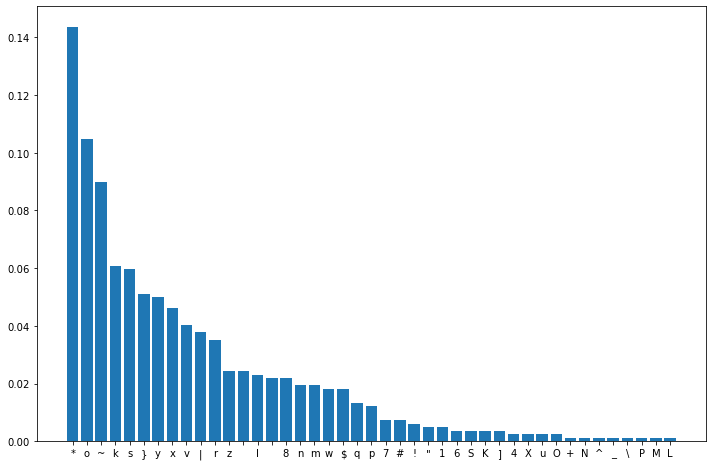

In [90]:
### 2.4.1.2 Plot
from matplotlib import pyplot as plt

def show_frequency(message):
    plt.figure(figsize =(12, 8))
    res = compute_frequency(message)
    keys = list(res.keys())
    keys.sort(key = lambda key: res[key])
    keys.reverse()
    plt.bar(x = keys, height = [res[key] for key in keys], label = keys)
    plt.show()

show_frequency(message_secret)

In [100]:
### Décodage de message_secret
# Grâce au diagramme donné sur l'énoncé, on sait que '*' correspond à ' ' donc le shift est
shift = ASCII.index("*") - ASCII.index(" ")
print(shift)
caesar(message_secret, ASCII, -shift)

10


"Beautiful is better than ugly.\nExplicit is better than implicit.\nSimple is better than complex.\nComplex is better than complicated.\nFlat is better than nested.\nSparse is better than dense.\nReadability counts.\nSpecial cases aren't special enough to break the rules.\nAlthough practicality beats purity.\nErrors should never pass silently.\nUnless explicitly silenced.\nIn the face of ambiguity, refuse the temptation to guess.\nThere should be one-- and preferably only one --obvious way to do it.\nAlthough that way may not be obvious at first unless you're Dutch.\nNow is better than never.\nAlthough never is often better than *right* now.\nIf the implementation is hard to explain, it's a bad idea.\nIf the implementation is easy to explain, it may be a good idea.\nNamespaces are one honking great idea -- let's do more of those!"

### Se casser les dents sur Vigenère
*À l'inverse, le code de Vigenère ne peut pas être attaqué directement par recherche fréquentielle.*

1. Utiliser `compute_frequency` sur le résultat de codage Vigenère `code_farm`. Expliquer le résultat.
2. À la lumière de cette analyse, proposer une méthode ou un critère qui assure une bonne robustesse pour le code de Vigenère.
3. Proposer un algorithme d'attaque par force brute.
   1. Quel est le nombre d'évaluations en fonction de la longueur de la clé? 
   2. Le tester sur le texte chiffré suivant (clé à deux caractères). 
   
```
'!)9-Jy4(4C!-.-'
```

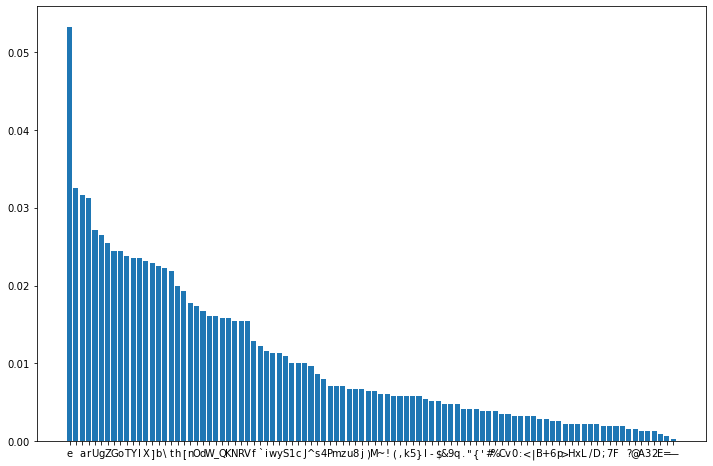

95


In [92]:
### 2.4.2.1 application sur du Vigenère
compute_frequency(code_farm)
show_frequency(code_farm)

Réponse textuelle 2.4.2.2
Plus on a de caractères différents dans la clé, plus elle est difficile à casser

Réponse textuelle 2.4.2.3.1
Si on prend un alphabet comme le ASCII que l'on a utilisé jusqu'ici de 95 caractères, le nombre d'évaluation est 95^(longueur de la clé).
Pour un alphabet comme UNICODE, le nombre d'évaluation est ecore bien plus important.
Dans tous les cas le caractère exponentiel rend très complexe un décodage.

In [94]:
#### Attaque par force brute
for i in range(len(ASCII)):
    for j in range(len(ASCII)):
        key = ASCII[i] + ASCII[j]
        enigma = Vigenere(alpha = ASCII, key = key)
        
        print(enigma.decode("!)9-Jy4(4C!-.-"))
        

!)9-Jy4(4C!-.-
!(9,Jx4'4B!,.,
!'9+Jw4&4A!+.+
!&9*Jv4%4@!*.*
!%9)Ju4$4?!).)
!$9(Jt4#4>!(.(
!#9'Js4"4=!'.'
!"9&Jr4!4<!&.&
!!9%Jq4 4;!%.%
! 9$Jp4~4:!$.$
!~9#Jo4}49!#.#
!}9"Jn4|48!"."
!|9!Jm4{47!!.!
!{9 Jl4z46! . 
!z9~Jk4y45!~.~
!y9}Jj4x44!}.}
!x9|Ji4w43!|.|
!w9{Jh4v42!{.{
!v9zJg4u41!z.z
!u9yJf4t40!y.y
!t9xJe4s4/!x.x
!s9wJd4r4.!w.w
!r9vJc4q4-!v.v
!q9uJb4p4,!u.u
!p9tJa4o4+!t.t
!o9sJ`4n4*!s.s
!n9rJ_4m4)!r.r
!m9qJ^4l4(!q.q
!l9pJ]4k4'!p.p
!k9oJ\4j4&!o.o
!j9nJ[4i4%!n.n
!i9mJZ4h4$!m.m
!h9lJY4g4#!l.l
!g9kJX4f4"!k.k
!f9jJW4e4!!j.j
!e9iJV4d4 !i.i
!d9hJU4c4~!h.h
!c9gJT4b4}!g.g
!b9fJS4a4|!f.f
!a9eJR4`4{!e.e
!`9dJQ4_4z!d.d
!_9cJP4^4y!c.c
!^9bJO4]4x!b.b
!]9aJN4\4w!a.a
!\9`JM4[4v!`.`
![9_JL4Z4u!_._
!Z9^JK4Y4t!^.^
!Y9]JJ4X4s!].]
!X9\JI4W4r!\.\
!W9[JH4V4q![.[
!V9ZJG4U4p!Z.Z
!U9YJF4T4o!Y.Y
!T9XJE4S4n!X.X
!S9WJD4R4m!W.W
!R9VJC4Q4l!V.V
!Q9UJB4P4k!U.U
!P9TJA4O4j!T.T
!O9SJ@4N4i!S.S
!N9RJ?4M4h!R.R
!M9QJ>4L4g!Q.Q
!L9PJ=4K4f!P.P
!K9OJ<4J4e!O.O
!J9NJ;4I4d!N.N
!I9MJ:4H4c!M.M
!H9LJ94G4b!L.L
!G9KJ84F4a!K.K
!F9JJ74E4`

y226C#-1-Ly6'6
y125C"-0-Ky5'5
y024C!-/-Jy4'4
y/23C -.-Iy3'3
y.22C~---Hy2'2
y-21C}-,-Gy1'1
y,20C|-+-Fy0'0
y+2/C{-*-Ey/'/
y*2.Cz-)-Dy.'.
x)1-By,(,Cx-&-
x(1,Bx,',Bx,&,
x'1+Bw,&,Ax+&+
x&1*Bv,%,@x*&*
x%1)Bu,$,?x)&)
x$1(Bt,#,>x(&(
x#1'Bs,",=x'&'
x"1&Br,!,<x&&&
x!1%Bq, ,;x%&%
x 1$Bp,~,:x$&$
x~1#Bo,},9x#&#
x}1"Bn,|,8x"&"
x|1!Bm,{,7x!&!
x{1 Bl,z,6x & 
xz1~Bk,y,5x~&~
xy1}Bj,x,4x}&}
xx1|Bi,w,3x|&|
xw1{Bh,v,2x{&{
xv1zBg,u,1xz&z
xu1yBf,t,0xy&y
xt1xBe,s,/xx&x
xs1wBd,r,.xw&w
xr1vBc,q,-xv&v
xq1uBb,p,,xu&u
xp1tBa,o,+xt&t
xo1sB`,n,*xs&s
xn1rB_,m,)xr&r
xm1qB^,l,(xq&q
xl1pB],k,'xp&p
xk1oB\,j,&xo&o
xj1nB[,i,%xn&n
xi1mBZ,h,$xm&m
xh1lBY,g,#xl&l
xg1kBX,f,"xk&k
xf1jBW,e,!xj&j
xe1iBV,d, xi&i
xd1hBU,c,~xh&h
xc1gBT,b,}xg&g
xb1fBS,a,|xf&f
xa1eBR,`,{xe&e
x`1dBQ,_,zxd&d
x_1cBP,^,yxc&c
x^1bBO,],xxb&b
x]1aBN,\,wxa&a
x\1`BM,[,vx`&`
x[1_BL,Z,ux_&_
xZ1^BK,Y,tx^&^
xY1]BJ,X,sx]&]
xX1\BI,W,rx\&\
xW1[BH,V,qx[&[
xV1ZBG,U,pxZ&Z
xU1YBF,T,oxY&Y
xT1XBE,S,nxX&X
xS1WBD,R,mxW&W
xR1VBC,Q,lxV&V
xQ1UBB,P,kxU&U
xP1TBA,O,jxT&T
xO1SB@,N,i

m.&27~!-!Hm2z2
m-&17}!,!Gm1z1
m,&07|!+!Fm0z0
m+&/7{!*!Em/z/
m*&.7z!)!Dm.z.
l)%-6y ( Cl-y-
l(%,6x ' Bl,y,
l'%+6w & Al+y+
l&%*6v % @l*y*
l%%)6u $ ?l)y)
l$%(6t # >l(y(
l#%'6s " =l'y'
l"%&6r ! <l&y&
l!%%6q   ;l%y%
l %$6p ~ :l$y$
l~%#6o } 9l#y#
l}%"6n | 8l"y"
l|%!6m { 7l!y!
l{% 6l z 6l y 
lz%~6k y 5l~y~
ly%}6j x 4l}y}
lx%|6i w 3l|y|
lw%{6h v 2l{y{
lv%z6g u 1lzyz
lu%y6f t 0lyyy
lt%x6e s /lxyx
ls%w6d r .lwyw
lr%v6c q -lvyv
lq%u6b p ,luyu
lp%t6a o +ltyt
lo%s6` n *lsys
ln%r6_ m )lryr
lm%q6^ l (lqyq
ll%p6] k 'lpyp
lk%o6\ j &loyo
lj%n6[ i %lnyn
li%m6Z h $lmym
lh%l6Y g #llyl
lg%k6X f "lkyk
lf%j6W e !ljyj
le%i6V d  liyi
ld%h6U c ~lhyh
lc%g6T b }lgyg
lb%f6S a |lfyf
la%e6R ` {leye
l`%d6Q _ zldyd
l_%c6P ^ ylcyc
l^%b6O ] xlbyb
l]%a6N \ wlaya
l\%`6M [ vl`y`
l[%_6L Z ul_y_
lZ%^6K Y tl^y^
lY%]6J X sl]y]
lX%\6I W rl\y\
lW%[6H V ql[y[
lV%Z6G U plZyZ
lU%Y6F T olYyY
lT%X6E S nlXyX
lS%W6D R mlWyW
lR%V6C Q llVyV
lQ%U6B P klUyU
lP%T6A O jlTyT
lO%S6@ N ilSyS
lN%R6? M hlRyR
lM%Q6> L glQyQ
lL%P6= K flPyP
lK%O6< J e

eu}y/fxtx0eyry
et}x/exsx/exrx
es}w/dxrx.ewrw
er}v/cxqx-evrv
eq}u/bxpx,euru
ep}t/axox+etrt
eo}s/`xnx*esrs
en}r/_xmx)errr
em}q/^xlx(eqrq
el}p/]xkx'eprp
ek}o/\xjx&eoro
ej}n/[xix%enrn
ei}m/Zxhx$emrm
eh}l/Yxgx#elrl
eg}k/Xxfx"ekrk
ef}j/Wxex!ejrj
ee}i/Vxdx eiri
ed}h/Uxcx~ehrh
ec}g/Txbx}egrg
eb}f/Sxax|efrf
ea}e/Rx`x{eere
e`}d/Qx_xzedrd
e_}c/Px^xyecrc
e^}b/Ox]xxebrb
e]}a/Nx\xweara
e\}`/Mx[xve`r`
e[}_/LxZxue_r_
eZ}^/KxYxte^r^
eY}]/JxXxse]r]
eX}\/IxWxre\r\
eW}[/HxVxqe[r[
eV}Z/GxUxpeZrZ
eU}Y/FxTxoeYrY
eT}X/ExSxneXrX
eS}W/DxRxmeWrW
eR}V/CxQxleVrV
eQ}U/BxPxkeUrU
eP}T/AxOxjeTrT
eO}S/@xNxieSrS
eN}R/?xMxheRrR
eM}Q/>xLxgeQrQ
eL}P/=xKxfePrP
eK}O/<xJxeeOrO
eJ}N/;xIxdeNrN
eI}M/:xHxceMrM
eH}L/9xGxbeLrL
eG}K/8xFxaeKrK
eF}J/7xEx`eJrJ
eE}I/6xDx_eIrI
eD}H/5xCx^eHrH
eC}G/4xBx]eGrG
eB}F/3xAx\eFrF
eA}E/2x@x[eErE
e@}D/1x?xZeDrD
e?}C/0x>xYeCrC
e>}B//x=xXeBrB
e=}A/.x<xWeArA
e<}@/-x;xVe@r@
e;}?/,x:xUe?r?
e:}>/+x9xTe>r>
e9}=/*x8xSe=r=
e8}</)x7xRe<r<
e7};/(x6xQe;r;
e6}:/'x5xPe:r:
e5}9/&x4xOe9r9
e4}8/%x3xNe8r8
e3}7/$x2xM

\Xt\&IoWor\\i\
\Wt[&HoVoq\[i[
\VtZ&GoUop\ZiZ
\UtY&FoToo\YiY
\TtX&EoSon\XiX
\StW&DoRom\WiW
\RtV&CoQol\ViV
\QtU&BoPok\UiU
\PtT&AoOoj\TiT
\OtS&@oNoi\SiS
\NtR&?oMoh\RiR
\MtQ&>oLog\QiQ
\LtP&=oKof\PiP
\KtO&<oJoe\OiO
\JtN&;oIod\NiN
\ItM&:oHoc\MiM
\HtL&9oGob\LiL
\GtK&8oFoa\KiK
\FtJ&7oEo`\JiJ
\EtI&6oDo_\IiI
\DtH&5oCo^\HiH
\CtG&4oBo]\GiG
\BtF&3oAo\\FiF
\AtE&2o@o[\EiE
\@tD&1o?oZ\DiD
\?tC&0o>oY\CiC
\>tB&/o=oX\BiB
\=tA&.o<oW\AiA
\<t@&-o;oV\@i@
\;t?&,o:oU\?i?
\:t>&+o9oT\>i>
\9t=&*o8oS\=i=
\8t<&)o7oR\<i<
\7t;&(o6oQ\;i;
\6t:&'o5oP\:i:
\5t9&&o4oO\9i9
\4t8&%o3oN\8i8
\3t7&$o2oM\7i7
\2t6&#o1oL\6i6
\1t5&"o0oK\5i5
\0t4&!o/oJ\4i4
\/t3& o.oI\3i3
\.t2&~o-oH\2i2
\-t1&}o,oG\1i1
\,t0&|o+oF\0i0
\+t/&{o*oE\/i/
\*t.&zo)oD\.i.
[)s-%yn(nC[-h-
[(s,%xn'nB[,h,
['s+%wn&nA[+h+
[&s*%vn%n@[*h*
[%s)%un$n?[)h)
[$s(%tn#n>[(h(
[#s'%sn"n=['h'
["s&%rn!n<[&h&
[!s%%qn n;[%h%
[ s$%pn~n:[$h$
[~s#%on}n9[#h#
[}s"%nn|n8["h"
[|s!%mn{n7[!h!
[{s %lnzn6[ h 
[zs~%knyn5[~h~
[ys}%jnxn4[}h}
[xs|%inwn3[|h|
[ws{%hnvn2[{h{
[vsz%gnun1[zhz
[usy%fntn0

V*n. zi)iDV.c.
U)m-~yh(hCU-b-
U(m,~xh'hBU,b,
U'm+~wh&hAU+b+
U&m*~vh%h@U*b*
U%m)~uh$h?U)b)
U$m(~th#h>U(b(
U#m'~sh"h=U'b'
U"m&~rh!h<U&b&
U!m%~qh h;U%b%
U m$~ph~h:U$b$
U~m#~oh}h9U#b#
U}m"~nh|h8U"b"
U|m!~mh{h7U!b!
U{m ~lhzh6U b 
Uzm~~khyh5U~b~
Uym}~jhxh4U}b}
Uxm|~ihwh3U|b|
Uwm{~hhvh2U{b{
Uvmz~ghuh1Uzbz
Uumy~fhth0Uyby
Utmx~ehsh/Uxbx
Usmw~dhrh.Uwbw
Urmv~chqh-Uvbv
Uqmu~bhph,Uubu
Upmt~ahoh+Utbt
Uoms~`hnh*Usbs
Unmr~_hmh)Urbr
Ummq~^hlh(Uqbq
Ulmp~]hkh'Upbp
Ukmo~\hjh&Uobo
Ujmn~[hih%Unbn
Uimm~Zhhh$Umbm
Uhml~Yhgh#Ulbl
Ugmk~Xhfh"Ukbk
Ufmj~Wheh!Ujbj
Uemi~Vhdh Uibi
Udmh~Uhch~Uhbh
Ucmg~Thbh}Ugbg
Ubmf~Shah|Ufbf
Uame~Rh`h{Uebe
U`md~Qh_hzUdbd
U_mc~Ph^hyUcbc
U^mb~Oh]hxUbbb
U]ma~Nh\hwUaba
U\m`~Mh[hvU`b`
U[m_~LhZhuU_b_
UZm^~KhYhtU^b^
UYm]~JhXhsU]b]
UXm\~IhWhrU\b\
UWm[~HhVhqU[b[
UVmZ~GhUhpUZbZ
UUmY~FhThoUYbY
UTmX~EhShnUXbX
USmW~DhRhmUWbW
URmV~ChQhlUVbV
UQmU~BhPhkUUbU
UPmT~AhOhjUTbT
UOmS~@hNhiUSbS
UNmR~?hMhhURbR
UMmQ~>hLhgUQbQ
ULmP~=hKhfUPbP
UKmO~<hJheUObO
UJmN~;hIhdUNbN
UImM~:hHhcUMbM
UHmL~9hGhbULbL
UGmK~8hFha

K<c@t-^;^VK@X@
K;c?t,^:^UK?X?
K:c>t+^9^TK>X>
K9c=t*^8^SK=X=
K8c<t)^7^RK<X<
K7c;t(^6^QK;X;
K6c:t'^5^PK:X:
K5c9t&^4^OK9X9
K4c8t%^3^NK8X8
K3c7t$^2^MK7X7
K2c6t#^1^LK6X6
K1c5t"^0^KK5X5
K0c4t!^/^JK4X4
K/c3t ^.^IK3X3
K.c2t~^-^HK2X2
K-c1t}^,^GK1X1
K,c0t|^+^FK0X0
K+c/t{^*^EK/X/
K*c.tz^)^DK.X.
J)b-sy](]CJ-W-
J(b,sx]']BJ,W,
J'b+sw]&]AJ+W+
J&b*sv]%]@J*W*
J%b)su]$]?J)W)
J$b(st]#]>J(W(
J#b'ss]"]=J'W'
J"b&sr]!]<J&W&
J!b%sq] ];J%W%
J b$sp]~]:J$W$
J~b#so]}]9J#W#
J}b"sn]|]8J"W"
J|b!sm]{]7J!W!
J{b sl]z]6J W 
Jzb~sk]y]5J~W~
Jyb}sj]x]4J}W}
Jxb|si]w]3J|W|
Jwb{sh]v]2J{W{
Jvbzsg]u]1JzWz
Jubysf]t]0JyWy
Jtbxse]s]/JxWx
Jsbwsd]r].JwWw
Jrbvsc]q]-JvWv
Jqbusb]p],JuWu
Jpbtsa]o]+JtWt
Jobss`]n]*JsWs
Jnbrs_]m])JrWr
Jmbqs^]l](JqWq
Jlbps]]k]'JpWp
Jkbos\]j]&JoWo
Jjbns[]i]%JnWn
JibmsZ]h]$JmWm
JhblsY]g]#JlWl
JgbksX]f]"JkWk
JfbjsW]e]!JjWj
JebisV]d] JiWi
JdbhsU]c]~JhWh
JcbgsT]b]}JgWg
JbbfsS]a]|JfWf
JabesR]`]{JeWe
J`bdsQ]_]zJdWd
J_bcsP]^]yJcWc
J^bbsO]]]xJbWb
J]basN]\]wJaWa
J\b`sM][]vJ`W`
J[b_sL]Z]uJ_W_
JZb^sK]Y]tJ^W^
JYb]sJ]X]s

Db\fmSWaW|DfQf
Da\emRW`W{DeQe
D`\dmQW_WzDdQd
D_\cmPW^WyDcQc
D^\bmOW]WxDbQb
D]\amNW\WwDaQa
D\\`mMW[WvD`Q`
D[\_mLWZWuD_Q_
DZ\^mKWYWtD^Q^
DY\]mJWXWsD]Q]
DX\\mIWWWrD\Q\
DW\[mHWVWqD[Q[
DV\ZmGWUWpDZQZ
DU\YmFWTWoDYQY
DT\XmEWSWnDXQX
DS\WmDWRWmDWQW
DR\VmCWQWlDVQV
DQ\UmBWPWkDUQU
DP\TmAWOWjDTQT
DO\Sm@WNWiDSQS
DN\Rm?WMWhDRQR
DM\Qm>WLWgDQQQ
DL\Pm=WKWfDPQP
DK\Om<WJWeDOQO
DJ\Nm;WIWdDNQN
DI\Mm:WHWcDMQM
DH\Lm9WGWbDLQL
DG\Km8WFWaDKQK
DF\Jm7WEW`DJQJ
DE\Im6WDW_DIQI
DD\Hm5WCW^DHQH
DC\Gm4WBW]DGQG
DB\Fm3WAW\DFQF
DA\Em2W@W[DEQE
D@\Dm1W?WZDDQD
D?\Cm0W>WYDCQC
D>\Bm/W=WXDBQB
D=\Am.W<WWDAQA
D<\@m-W;WVD@Q@
D;\?m,W:WUD?Q?
D:\>m+W9WTD>Q>
D9\=m*W8WSD=Q=
D8\<m)W7WRD<Q<
D7\;m(W6WQD;Q;
D6\:m'W5WPD:Q:
D5\9m&W4WOD9Q9
D4\8m%W3WND8Q8
D3\7m$W2WMD7Q7
D2\6m#W1WLD6Q6
D1\5m"W0WKD5Q5
D0\4m!W/WJD4Q4
D/\3m W.WID3Q3
D.\2m~W-WHD2Q2
D-\1m}W,WGD1Q1
D,\0m|W+WFD0Q0
D+\/m{W*WED/Q/
D*\.mzW)WDD.Q.
C)[-lyV(VCC-P-
C([,lxV'VBC,P,
C'[+lwV&VAC+P+
C&[*lvV%V@C*P*
C%[)luV$V?C)P)
C$[(ltV#V>C(P(
C#['lsV"V=C'P'
C"[&lrV!V<C&P&
C![%lqV V;C%P%
C [$lpV~V:

>aVegRQ`Q{>eKe
>`VdgQQ_Qz>dKd
>_VcgPQ^Qy>cKc
>^VbgOQ]Qx>bKb
>]VagNQ\Qw>aKa
>\V`gMQ[Qv>`K`
>[V_gLQZQu>_K_
>ZV^gKQYQt>^K^
>YV]gJQXQs>]K]
>XV\gIQWQr>\K\
>WV[gHQVQq>[K[
>VVZgGQUQp>ZKZ
>UVYgFQTQo>YKY
>TVXgEQSQn>XKX
>SVWgDQRQm>WKW
>RVVgCQQQl>VKV
>QVUgBQPQk>UKU
>PVTgAQOQj>TKT
>OVSg@QNQi>SKS
>NVRg?QMQh>RKR
>MVQg>QLQg>QKQ
>LVPg=QKQf>PKP
>KVOg<QJQe>OKO
>JVNg;QIQd>NKN
>IVMg:QHQc>MKM
>HVLg9QGQb>LKL
>GVKg8QFQa>KKK
>FVJg7QEQ`>JKJ
>EVIg6QDQ_>IKI
>DVHg5QCQ^>HKH
>CVGg4QBQ]>GKG
>BVFg3QAQ\>FKF
>AVEg2Q@Q[>EKE
>@VDg1Q?QZ>DKD
>?VCg0Q>QY>CKC
>>VBg/Q=QX>BKB
>=VAg.Q<QW>AKA
><V@g-Q;QV>@K@
>;V?g,Q:QU>?K?
>:V>g+Q9QT>>K>
>9V=g*Q8QS>=K=
>8V<g)Q7QR><K<
>7V;g(Q6QQ>;K;
>6V:g'Q5QP>:K:
>5V9g&Q4QO>9K9
>4V8g%Q3QN>8K8
>3V7g$Q2QM>7K7
>2V6g#Q1QL>6K6
>1V5g"Q0QK>5K5
>0V4g!Q/QJ>4K4
>/V3g Q.QI>3K3
>.V2g~Q-QH>2K2
>-V1g}Q,QG>1K1
>,V0g|Q+QF>0K0
>+V/g{Q*QE>/K/
>*V.gzQ)QD>.K.
=)U-fyP(PC=-J-
=(U,fxP'PB=,J,
='U+fwP&PA=+J+
=&U*fvP%P@=*J*
=%U)fuP$P?=)J)
=$U(ftP#P>=(J(
=#U'fsP"P=='J'
="U&frP!P<=&J&
=!U%fqP P;=%J%
= U$fpP~P:=$J$
=~U#foP}P9

4/L3] G.GI43A3
4.L2]~G-GH42A2
4-L1]}G,GG41A1
4,L0]|G+GF40A0
4+L/]{G*GE4/A/
4*L.]zG)GD4.A.
3)K-\yF(FC3-@-
3(K,\xF'FB3,@,
3'K+\wF&FA3+@+
3&K*\vF%F@3*@*
3%K)\uF$F?3)@)
3$K(\tF#F>3(@(
3#K'\sF"F=3'@'
3"K&\rF!F<3&@&
3!K%\qF F;3%@%
3 K$\pF~F:3$@$
3~K#\oF}F93#@#
3}K"\nF|F83"@"
3|K!\mF{F73!@!
3{K \lFzF63 @ 
3zK~\kFyF53~@~
3yK}\jFxF43}@}
3xK|\iFwF33|@|
3wK{\hFvF23{@{
3vKz\gFuF13z@z
3uKy\fFtF03y@y
3tKx\eFsF/3x@x
3sKw\dFrF.3w@w
3rKv\cFqF-3v@v
3qKu\bFpF,3u@u
3pKt\aFoF+3t@t
3oKs\`FnF*3s@s
3nKr\_FmF)3r@r
3mKq\^FlF(3q@q
3lKp\]FkF'3p@p
3kKo\\FjF&3o@o
3jKn\[FiF%3n@n
3iKm\ZFhF$3m@m
3hKl\YFgF#3l@l
3gKk\XFfF"3k@k
3fKj\WFeF!3j@j
3eKi\VFdF 3i@i
3dKh\UFcF~3h@h
3cKg\TFbF}3g@g
3bKf\SFaF|3f@f
3aKe\RF`F{3e@e
3`Kd\QF_Fz3d@d
3_Kc\PF^Fy3c@c
3^Kb\OF]Fx3b@b
3]Ka\NF\Fw3a@a
3\K`\MF[Fv3`@`
3[K_\LFZFu3_@_
3ZK^\KFYFt3^@^
3YK]\JFXFs3]@]
3XK\\IFWFr3\@\
3WK[\HFVFq3[@[
3VKZ\GFUFp3Z@Z
3UKY\FFTFo3Y@Y
3TKX\EFSFn3X@X
3SKW\DFRFm3W@W
3RKV\CFQFl3V@V
3QKU\BFPFk3U@U
3PKT\AFOFj3T@T
3OKS\@FNFi3S@S
3NKR\?FMFh3R@R
3MKQ\>FLFg3Q@Q
3LKP\=FKFf

,fDjUW?e?!,j9j
,eDiUV?d? ,i9i
,dDhUU?c?~,h9h
,cDgUT?b?},g9g
,bDfUS?a?|,f9f
,aDeUR?`?{,e9e
,`DdUQ?_?z,d9d
,_DcUP?^?y,c9c
,^DbUO?]?x,b9b
,]DaUN?\?w,a9a
,\D`UM?[?v,`9`
,[D_UL?Z?u,_9_
,ZD^UK?Y?t,^9^
,YD]UJ?X?s,]9]
,XD\UI?W?r,\9\
,WD[UH?V?q,[9[
,VDZUG?U?p,Z9Z
,UDYUF?T?o,Y9Y
,TDXUE?S?n,X9X
,SDWUD?R?m,W9W
,RDVUC?Q?l,V9V
,QDUUB?P?k,U9U
,PDTUA?O?j,T9T
,ODSU@?N?i,S9S
,NDRU??M?h,R9R
,MDQU>?L?g,Q9Q
,LDPU=?K?f,P9P
,KDOU<?J?e,O9O
,JDNU;?I?d,N9N
,IDMU:?H?c,M9M
,HDLU9?G?b,L9L
,GDKU8?F?a,K9K
,FDJU7?E?`,J9J
,EDIU6?D?_,I9I
,DDHU5?C?^,H9H
,CDGU4?B?],G9G
,BDFU3?A?\,F9F
,ADEU2?@?[,E9E
,@DDU1???Z,D9D
,?DCU0?>?Y,C9C
,>DBU/?=?X,B9B
,=DAU.?<?W,A9A
,<D@U-?;?V,@9@
,;D?U,?:?U,?9?
,:D>U+?9?T,>9>
,9D=U*?8?S,=9=
,8D<U)?7?R,<9<
,7D;U(?6?Q,;9;
,6D:U'?5?P,:9:
,5D9U&?4?O,999
,4D8U%?3?N,898
,3D7U$?2?M,797
,2D6U#?1?L,696
,1D5U"?0?K,595
,0D4U!?/?J,494
,/D3U ?.?I,393
,.D2U~?-?H,292
,-D1U}?,?G,191
,,D0U|?+?F,090
,+D/U{?*?E,/9/
,*D.Uz?)?D,.9.
+)C-Ty>(>C+-8-
+(C,Tx>'>B+,8,
+'C+Tw>&>A++8+
+&C*Tv>%>@+*8*
+%C)Tu>$>?+)8)
+$C(Tt>#>>

"\:`KM5[5v"`/`
"[:_KL5Z5u"_/_
"Z:^KK5Y5t"^/^
"Y:]KJ5X5s"]/]
"X:\KI5W5r"\/\
"W:[KH5V5q"[/[
"V:ZKG5U5p"Z/Z
"U:YKF5T5o"Y/Y
"T:XKE5S5n"X/X
"S:WKD5R5m"W/W
"R:VKC5Q5l"V/V
"Q:UKB5P5k"U/U
"P:TKA5O5j"T/T
"O:SK@5N5i"S/S
"N:RK?5M5h"R/R
"M:QK>5L5g"Q/Q
"L:PK=5K5f"P/P
"K:OK<5J5e"O/O
"J:NK;5I5d"N/N
"I:MK:5H5c"M/M
"H:LK95G5b"L/L
"G:KK85F5a"K/K
"F:JK75E5`"J/J
"E:IK65D5_"I/I
"D:HK55C5^"H/H
"C:GK45B5]"G/G
"B:FK35A5\"F/F
"A:EK25@5["E/E
"@:DK15?5Z"D/D
"?:CK05>5Y"C/C
">:BK/5=5X"B/B
"=:AK.5<5W"A/A
"<:@K-5;5V"@/@
";:?K,5:5U"?/?
"::>K+595T">/>
"9:=K*585S"=/=
"8:<K)575R"</<
"7:;K(565Q";/;
"6::K'555P":/:
"5:9K&545O"9/9
"4:8K%535N"8/8
"3:7K$525M"7/7
"2:6K#515L"6/6
"1:5K"505K"5/5
"0:4K!5/5J"4/4
"/:3K 5.5I"3/3
".:2K~5-5H"2/2
"-:1K}5,5G"1/1
",:0K|5+5F"0/0
"+:/K{5*5E"///
"*:.Kz5)5D"./.
